In [5]:
import numpy as np
import matplotlib.pyplot as plt
import struct
import sys
import os
% matplotlib inline

In [16]:
print os.getcwd()
print os.path.isfile('train-images.idx3-ubyte')
print os.path.isfile('train-labels.idx1-ubyte')


/home/js3611/PycharmProjects/ISO/SparseModelling
True
True


### Read Labels

In [33]:
def read_mnist_label(data_type='train'):
    
    if data_type == 'train':
        name = 'train-labels.idx1-ubyte'
    else:
        name = 't10k-labels.idx1-ubyte'
    
    # Open file and read data
    f_label_raw = open(name,'rb')
    data = f_label_raw.read()
    f_label_raw.close()

    # Read number of labels and define offset
    magic_number =  struct.unpack('>i',data[0:4]) #magic number
    nlabels = struct.unpack('>i',data[4:8])[0] # nlabels
    offset = 8

    # Get labels
    labels = np.array(struct.unpack('b'*len(data[8:]),data[8:]))

    return labels

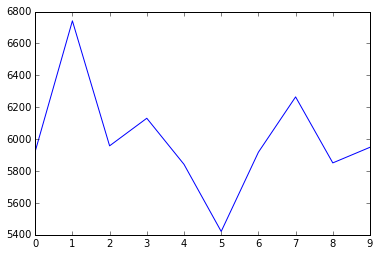

In [28]:
labels = read_mnist_label()
# Plot histogram
hist = np.histogram(labels,np.arange(11))
plt.plot(hist[1][0:-1],hist[0])

In [34]:
def read_mnist_data(data_type='train'):
    '''
    Returns:
        numpy array of mnist digits in 2D
        
    '''
    if data_type == 'train':
        name = 'train-images.idx3-ubyte'
    else:
        name = 't10k-images.idx3-ubyte'
        
    # Read data
    f_raw = open(name,'rb')
    data = f_raw.read()
    f_raw.close()

    # Read number of images
    magic_number =  struct.unpack('>i',data[0:4]) #magic number
    n, n_row, n_col = struct.unpack('>iii',data[4:16])
    img_size = n_row * n_col
    offset = 16
    fmt = 'B'*img_size*n

    # Read them and store in numpy array
    images_unformatted = struct.unpack(fmt, data[offset:])
    images = np.array(images_unformatted).reshape(n,n_row,n_col)
    return images

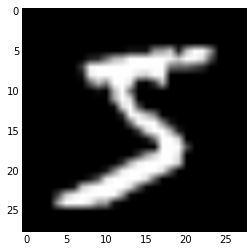

In [31]:
import matplotlib.cm as cm
images = read_mnist_data()
plt.imshow(images[0], cmap=cm.Greys_r)

In [35]:
def read_mnist():
    train_x = read_mnist_data('train')
    train_y = read_mnist_label('train')
    test_x = read_mnist_data('test')
    test_y = read_mnist_label('test')
    return [(train_x, train_y),(test_x, test_y)]

In [36]:
data = read_mnist()

In [40]:
train, test = data
train_x, train_y = train
test_x, test_y = test

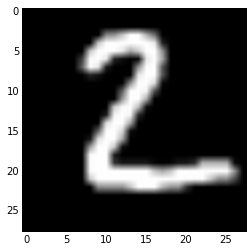

In [42]:
plt.imshow(test_x[1],cmap=cm.Greys_r)